# PROJECT EINSTEIN - EDA on MIL DETAIL, CSDC & FAULTS DATA TABLES

In [1]:
# importing libraries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


## MIL Dataset

In [2]:
df = pd.read_csv('MIL_Week_Detail_query_20181121_163253.csv', sep='|', parse_dates=['ISSUE_TIMESTAMP'], infer_datetime_format=True )

C:\Users\oyasar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
df.ISSUE_AREA.value_counts()

TVE    2675476
Name: ISSUE_AREA, dtype: int64

In [17]:
df.shape

(2675476, 23)

In [18]:
df.head()

,ICOMS_ACCOUNT_UID,CUSTOMER_ACCOUNT_ID,EVENT_DATE,ISSUE_ID,ISSUE_TYPE_ID,ISSUE_AREA,ISSUE_COUNT,ISSUE_TIMESTAMP,ISSUE_UPDATED_TIMESTAMP,MAC_ADDRESS,CMTS_ID,CABINET_ID,ICOMS_SITE_ID,PREMISE_ID,ACCOUNT_NUMBER,SERVICE_TYPE,TIME_BANDING,OUTAGEPRIORITY,OUTAGETYPE,OUTAGEID,STB_ID,LOAD_DATE,BATCH_ID
0,31707810602,88623481,2018-10-01 00:00:00.000000,295133941,404,TVE,1,2018-10-01 22:12:29,2018-10-02 05:51:38.000000,341fe4cd2f48,2776,754596,31,7078106,707810602,DTV,LATEPEAK,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206
1,15080783003,158343735,2018-10-01 00:00:00.000000,294268026,404,TVE,1,2018-10-01 16:32:35,2018-10-01 23:34:49.000000,509551c3c0e5,2595,684508,15,807830,80783003,DTV,EARLYPEAK,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206
2,25404803103,87498996,2018-10-01 00:00:00.000000,294929734,408,TVE,1,2018-10-01 17:28:55,2018-10-02 02:58:06.000000,5095517f5539,2475,107187,25,4048031,404803103,DTV,EARLYPEAK,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206
3,18801228503,103190052,2018-10-01 00:00:00.000000,292548983,408,TVE,1,2018-10-01 08:59:17,2018-10-01 15:28:55.000000,c0a00dc82ffa,2697,506218,18,8012285,801228503,DTV,MORNING,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206
4,28313265607,87465253,2018-10-01 00:00:00.000000,3813977,404,TVE,1,2018-10-01 12:40:56,2018-10-03 05:28:49.000000,3c0461d19003,2569,434613,28,3132656,313265607,DTV,DAY,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206


In [19]:
df.dtypes

ICOMS_ACCOUNT_UID                   int64
CUSTOMER_ACCOUNT_ID                 int64
EVENT_DATE                         object
ISSUE_ID                            int64
ISSUE_TYPE_ID                       int64
ISSUE_AREA                         object
ISSUE_COUNT                         int64
ISSUE_TIMESTAMP            datetime64[ns]
ISSUE_UPDATED_TIMESTAMP            object
MAC_ADDRESS                        object
CMTS_ID                             int64
CABINET_ID                          int64
ICOMS_SITE_ID                       int64
PREMISE_ID                          int64
ACCOUNT_NUMBER                      int64
SERVICE_TYPE                       object
TIME_BANDING                       object
OUTAGEPRIORITY                      int64
OUTAGETYPE                         object
OUTAGEID                          float64
STB_ID                             object
LOAD_DATE                          object
BATCH_ID                            int64
dtype: object

In [3]:
# seperate date-time values
df['DAY'] = df.ISSUE_TIMESTAMP.dt.day
df['MONTH'] = df.ISSUE_TIMESTAMP.dt.month
df['TIME'] = df.ISSUE_TIMESTAMP.dt.time
df['WDAY'] = df.ISSUE_TIMESTAMP.dt.day_name()

In [21]:
df.head()

,ICOMS_ACCOUNT_UID,CUSTOMER_ACCOUNT_ID,EVENT_DATE,ISSUE_ID,ISSUE_TYPE_ID,ISSUE_AREA,ISSUE_COUNT,ISSUE_TIMESTAMP,ISSUE_UPDATED_TIMESTAMP,MAC_ADDRESS,CMTS_ID,CABINET_ID,ICOMS_SITE_ID,PREMISE_ID,ACCOUNT_NUMBER,SERVICE_TYPE,TIME_BANDING,OUTAGEPRIORITY,OUTAGETYPE,OUTAGEID,STB_ID,LOAD_DATE,BATCH_ID,DAY,MONTH,TIME,WDAY
0,31707810602,88623481,2018-10-01 00:00:00.000000,295133941,404,TVE,1,2018-10-01 22:12:29,2018-10-02 05:51:38.000000,341fe4cd2f48,2776,754596,31,7078106,707810602,DTV,LATEPEAK,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206,1,10,22:12:29,Monday
1,15080783003,158343735,2018-10-01 00:00:00.000000,294268026,404,TVE,1,2018-10-01 16:32:35,2018-10-01 23:34:49.000000,509551c3c0e5,2595,684508,15,807830,80783003,DTV,EARLYPEAK,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206,1,10,16:32:35,Monday
2,25404803103,87498996,2018-10-01 00:00:00.000000,294929734,408,TVE,1,2018-10-01 17:28:55,2018-10-02 02:58:06.000000,5095517f5539,2475,107187,25,4048031,404803103,DTV,EARLYPEAK,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206,1,10,17:28:55,Monday
3,18801228503,103190052,2018-10-01 00:00:00.000000,292548983,408,TVE,1,2018-10-01 08:59:17,2018-10-01 15:28:55.000000,c0a00dc82ffa,2697,506218,18,8012285,801228503,DTV,MORNING,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206,1,10,08:59:17,Monday
4,28313265607,87465253,2018-10-01 00:00:00.000000,3813977,404,TVE,1,2018-10-01 12:40:56,2018-10-03 05:28:49.000000,3c0461d19003,2569,434613,28,3132656,313265607,DTV,DAY,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206,1,10,12:40:56,Monday


In [22]:
df.columns

Index(['ICOMS_ACCOUNT_UID', 'CUSTOMER_ACCOUNT_ID', 'EVENT_DATE', 'ISSUE_ID',
       'ISSUE_TYPE_ID', 'ISSUE_AREA', 'ISSUE_COUNT', 'ISSUE_TIMESTAMP',
       'ISSUE_UPDATED_TIMESTAMP', 'MAC_ADDRESS', 'CMTS_ID', 'CABINET_ID',
       'ICOMS_SITE_ID', 'PREMISE_ID', 'ACCOUNT_NUMBER', 'SERVICE_TYPE',
       'TIME_BANDING', 'OUTAGEPRIORITY', 'OUTAGETYPE', 'OUTAGEID', 'STB_ID',
       'LOAD_DATE', 'BATCH_ID', 'DAY', 'MONTH', 'TIME', 'WDAY'],
      dtype='object')

### Functions to bulk create unique column values and value counts

In [4]:
# returns a dictionary with the column names as the keys and the unique values as the values
def unique_val(df):
    unique = {i: len(df[i].unique()) for i in df.columns}
    pprint(unique)
    
# returns a dictionay with column names as keys and a list of value counts for the corresponding column as it's value
def val_count(df):
    counts = {i: [df[i].value_counts()] for i in df.columns}
    pprint(counts)

In [24]:
unique_val(df[['ISSUE_TYPE_ID', 'MAC_ADDRESS', 'CMTS_ID', 'CABINET_ID', 'ICOMS_SITE_ID', 'PREMISE_ID', 'ACCOUNT_NUMBER', 'TIME_BANDING', 'DAY', 'MONTH'  ]])

{'ACCOUNT_NUMBER': 436874,
 'CABINET_ID': 253988,
 'CMTS_ID': 681,
 'DAY': 7,
 'ICOMS_SITE_ID': 23,
 'ISSUE_TYPE_ID': 6,
 'MAC_ADDRESS': 456415,
 'MONTH': 1,
 'PREMISE_ID': 429498,
 'TIME_BANDING': 7}


In [25]:
df.WDAY.value_counts()

Sunday       446517
Saturday     432278
Thursday     401776
Wednesday    384929
Tuesday      362936
Monday       352881
Friday       294159
Name: WDAY, dtype: int64

### Daily Issue Distribution Plots

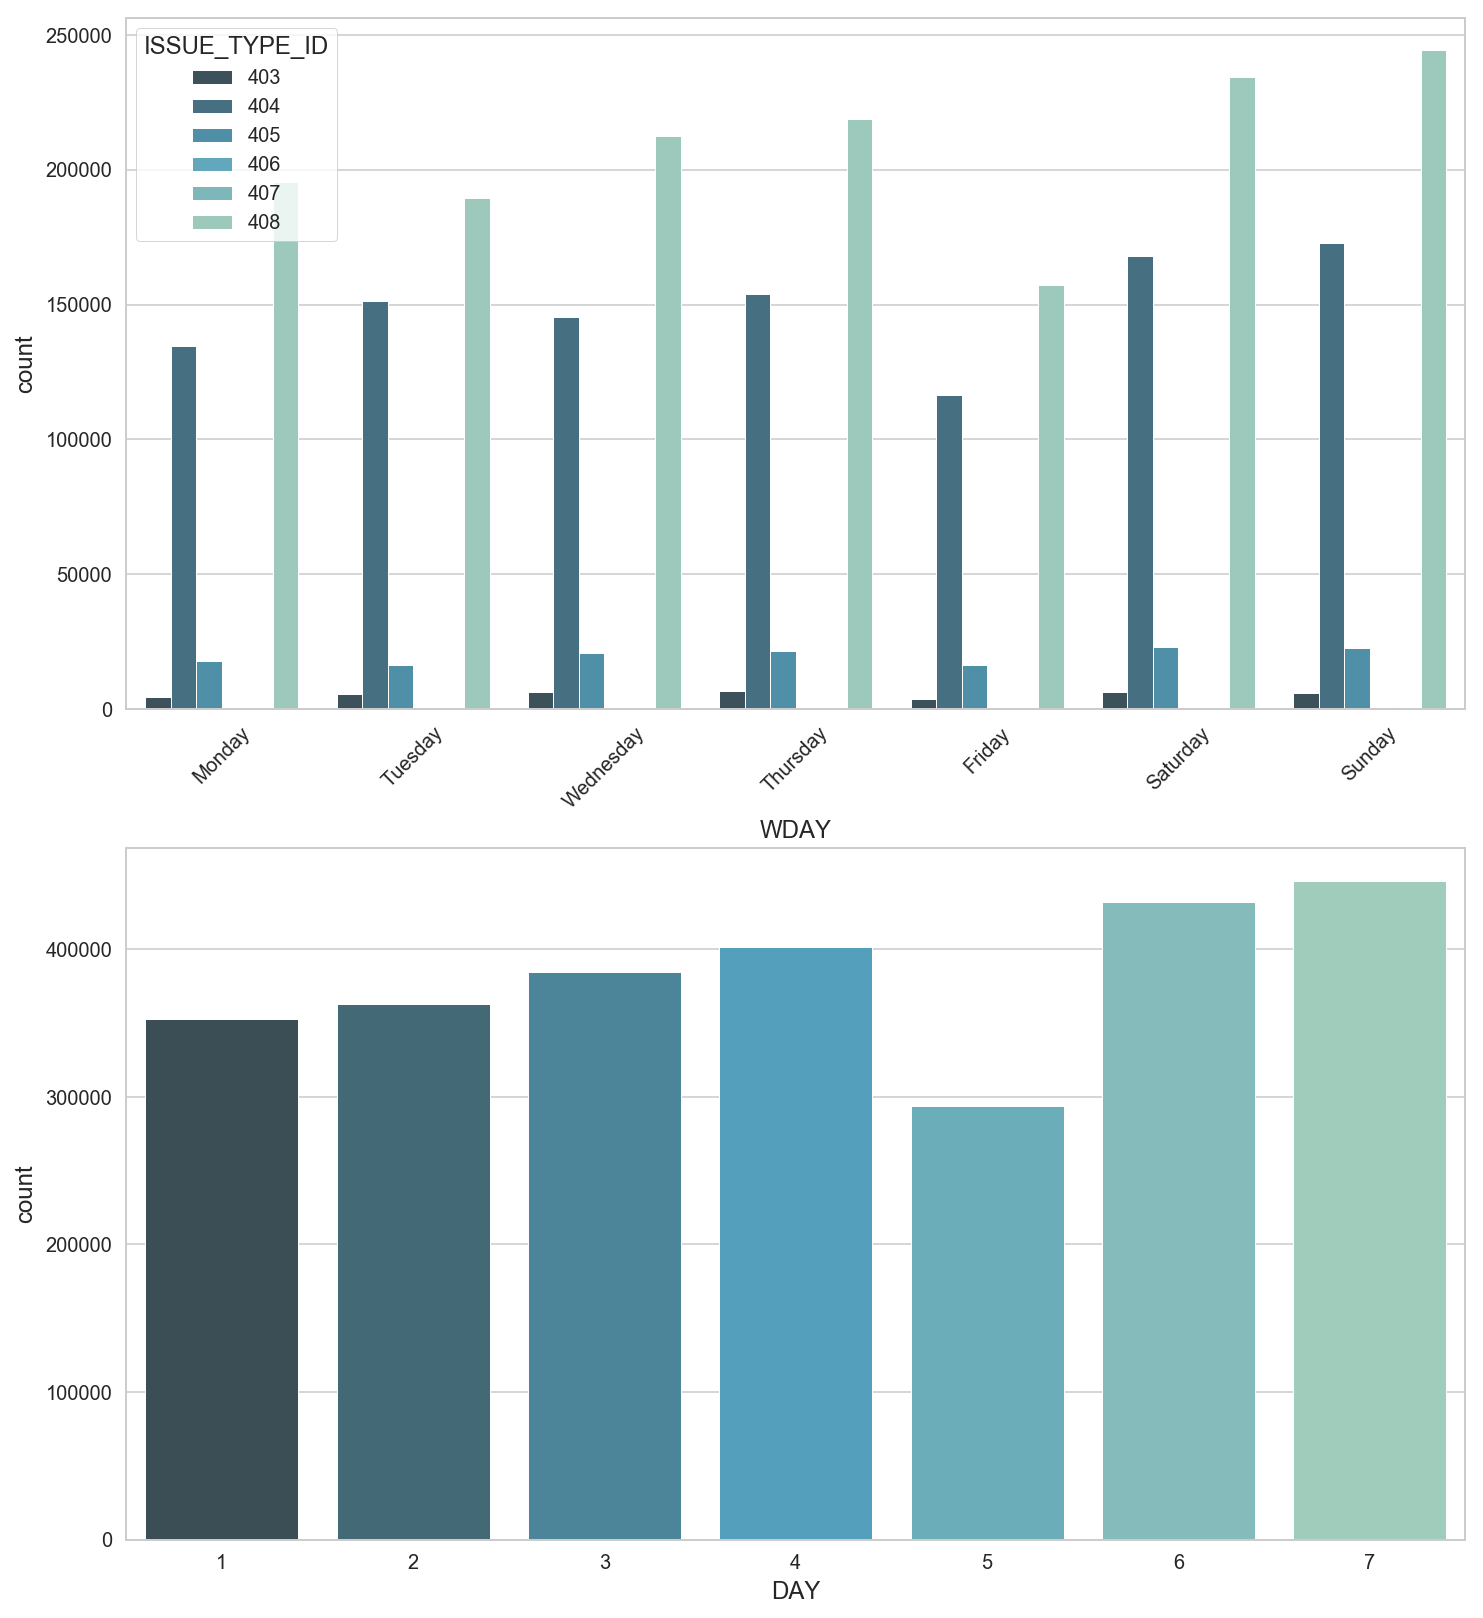

In [26]:
# daily error distribution
# for this particular time frame 01/10/2018 corresponds to a Monday.
sns.set_style('whitegrid')
c_palette = sns.cubehelix_palette(8, start=.5, rot=-.75)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12, 14) )
sns.countplot(x='WDAY', data=df, palette='GnBu_d', ax=ax1, hue='ISSUE_TYPE_ID')
ax1.set_xticklabels(rotation=45, labels = ax1.get_xticklabels())
sns.countplot(x='DAY', data=df, palette='GnBu_d', ax=ax2);

### Issue Distributions and Time Bandings

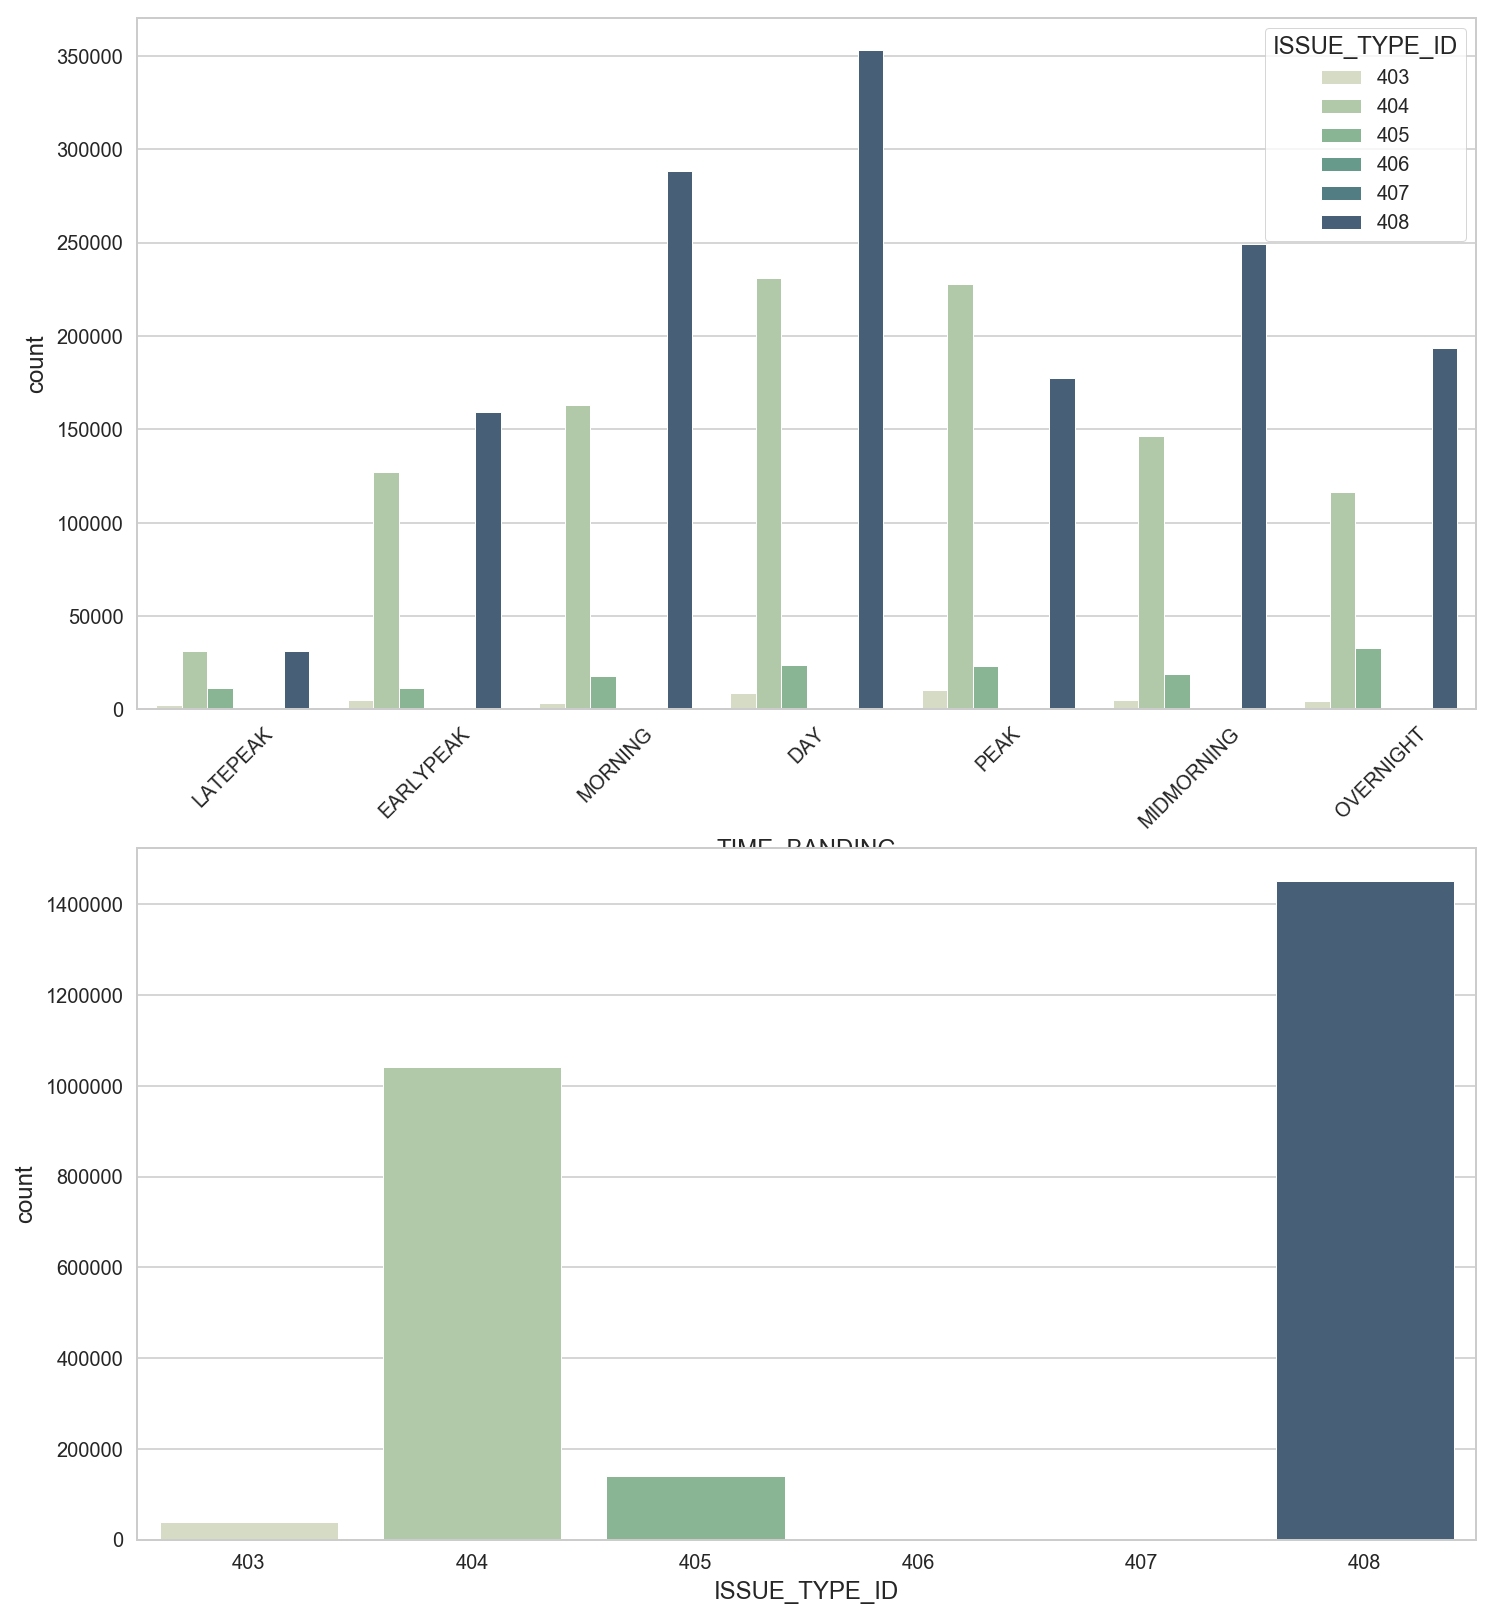

In [27]:
#issue type distribution & time bandings
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 14) )
sns.countplot(x='TIME_BANDING', data=df, palette=c_palette, ax=ax1, hue='ISSUE_TYPE_ID')
ax1.set_xticklabels(rotation=45, labels=ax1.get_xticklabels())
sns.countplot(x='ISSUE_TYPE_ID', data=df, palette=c_palette, ax=ax2);

In [28]:
df.ISSUE_COUNT.unique()

array([  1,   3,   2,  23,  21,  12,  30,  48,   4,   8,  52,  60,  22,
         6,  42,  25,  50,  36,  19,  13,  10,  54,  18,   7,   5,  24,
        40,  20,  66,  93,  45,  73,  75, 103, 109, 161,  38,  81,  71,
        47,  83,  28,  16,  11,  31,  14,  29,  82,  63,  15,  17,  90,
         9, 143,  41, 124, 100,  98,  34,  27,  56,  79,  49,  65,  46,
        62,  43,  39,  44, 105,  32, 141,  33,  64,  88,  72,  57,  74,
        78,  53,  67,  37,  51,  69, 125, 120, 116,  59,  87,  58,  92,
       113,  80, 172,  26, 114,  77, 135,  55, 126,  89], dtype=int64)

In [29]:
df.ISSUE_AREA.unique()

array(['TVE'], dtype=object)

In [30]:
#dft inlcudes time stamps as index
dft = df.set_index('ISSUE_TIMESTAMP')

In [31]:
dft.sort_index(inplace=True)

In [32]:
dft.head()

,ICOMS_ACCOUNT_UID,CUSTOMER_ACCOUNT_ID,EVENT_DATE,ISSUE_ID,ISSUE_TYPE_ID,ISSUE_AREA,ISSUE_COUNT,ISSUE_UPDATED_TIMESTAMP,MAC_ADDRESS,CMTS_ID,CABINET_ID,ICOMS_SITE_ID,PREMISE_ID,ACCOUNT_NUMBER,SERVICE_TYPE,TIME_BANDING,OUTAGEPRIORITY,OUTAGETYPE,OUTAGEID,STB_ID,LOAD_DATE,BATCH_ID,DAY,MONTH,TIME,WDAY
ISSUE_TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10-01 00:00:00,20410406801,99158268,2018-10-01 00:00:00.000000,294159322,408,TVE,1,2018-10-01 23:34:49.000000,20f19e3428bf,2598,106019,20,4104068,410406801,DTV,OVERNIGHT,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206,1,10,00:00:00,Monday
2018-10-01 00:00:00,20647169701,104289048,2018-10-01 00:00:00.000000,291347640,405,TVE,1,2018-10-01 10:17:56.000000,2c9569e07218,2614,269549,20,6471697,647169701,DTV,OVERNIGHT,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206,1,10,00:00:00,Monday
2018-10-01 00:00:02,10400050203,79561273,2018-10-01 00:00:00.000000,291214868,408,TVE,1,2018-10-01 08:28:59.000000,5095513beeb0,2657,152656,10,4000502,400050203,DTV,OVERNIGHT,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206,1,10,00:00:02,Monday
2018-10-01 00:00:03,30823372201,92407115,2018-10-01 00:00:00.000000,3906754,404,TVE,1,2018-10-03 05:28:49.000000,bc2e482e73f8,2487,747359,30,8233722,823372201,DTV,OVERNIGHT,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206,1,10,00:00:03,Monday
2018-10-01 00:00:04,20410406801,99158268,2018-10-01 00:00:00.000000,294159346,408,TVE,1,2018-10-01 23:34:49.000000,20f19e3428bf,2598,106019,20,4104068,410406801,DTV,OVERNIGHT,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206,1,10,00:00:04,Monday


### Issue Count Distribution over time

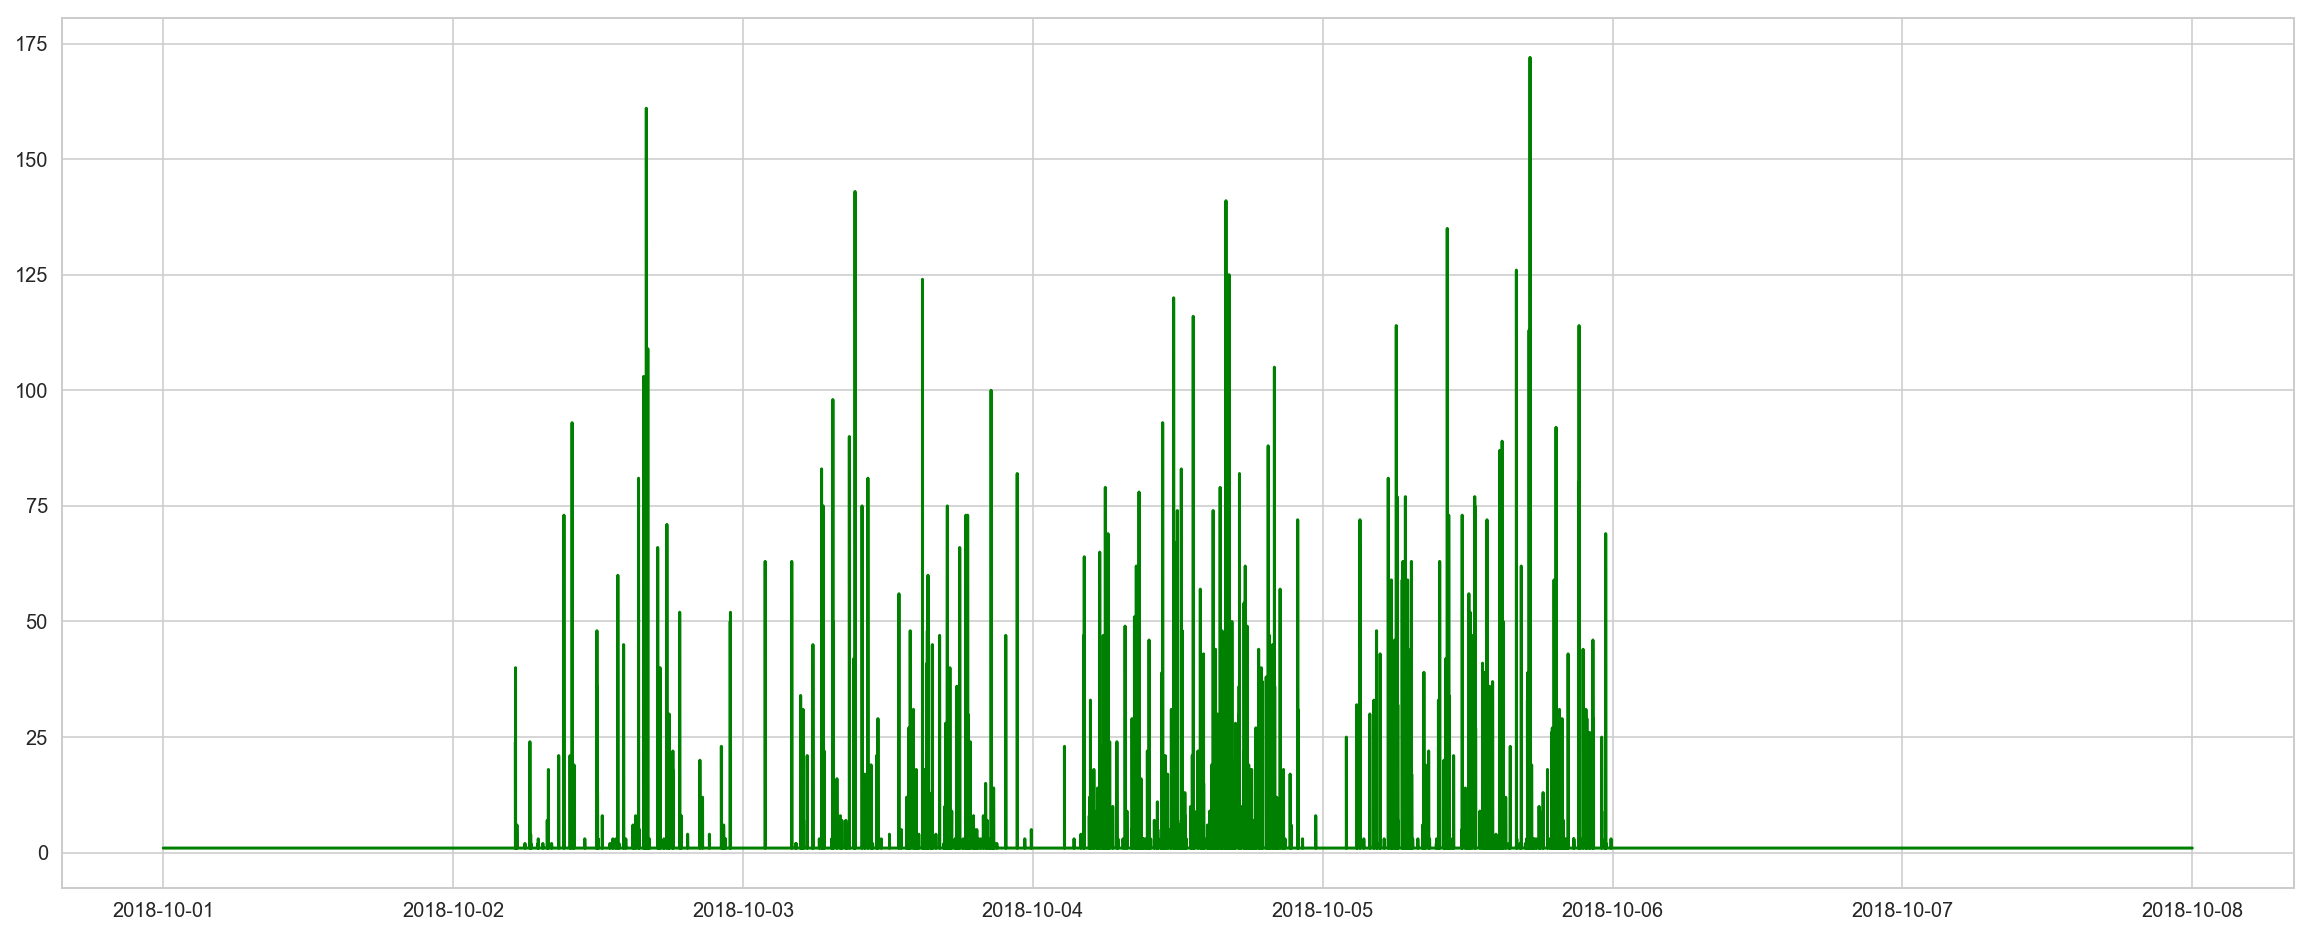

In [33]:
#Issue count distribution over time
figure, ax = plt.subplots(1,1, figsize=(20,8))
plt.plot(dft.ISSUE_COUNT, c='g');

### Issue Counts Frequency Distribution

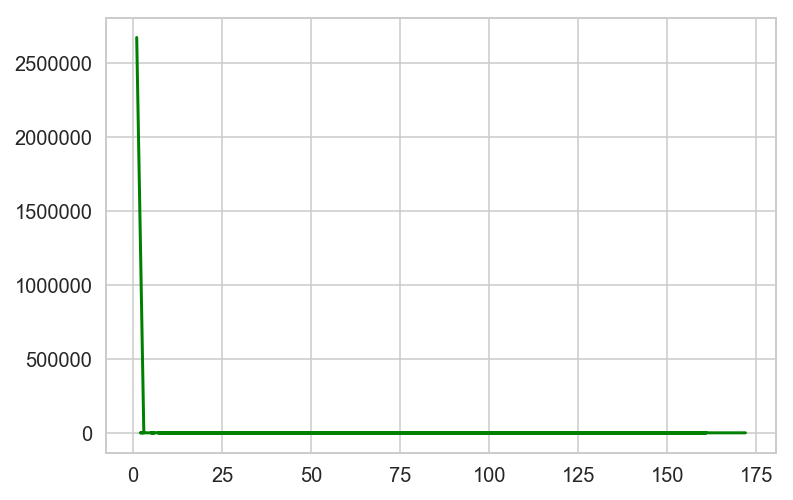

In [34]:
#issue counts frequency distribution plot
dft.ISSUE_COUNT.value_counts().plot(c='g');

### Issue Counts & Issue Types

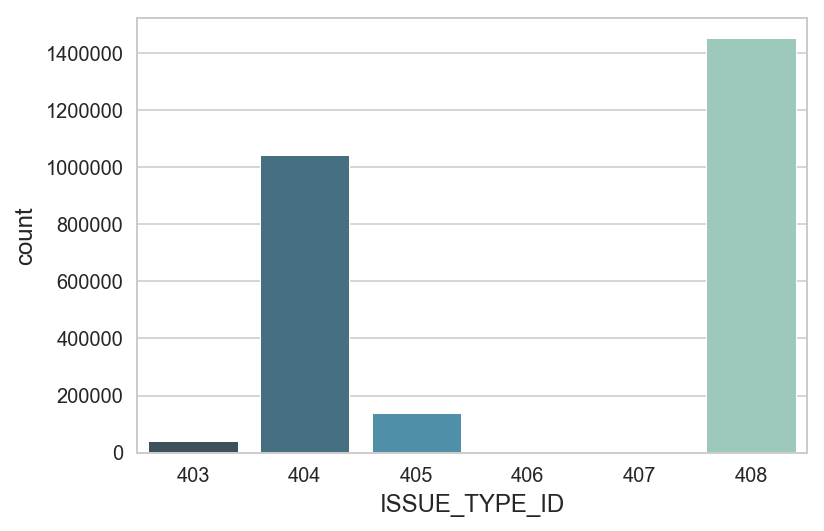

In [35]:
#issue type breakdown for the issue_count = 1
sns.countplot(x=dft.loc[dft.ISSUE_COUNT==1].ISSUE_TYPE_ID, palette='GnBu_d');

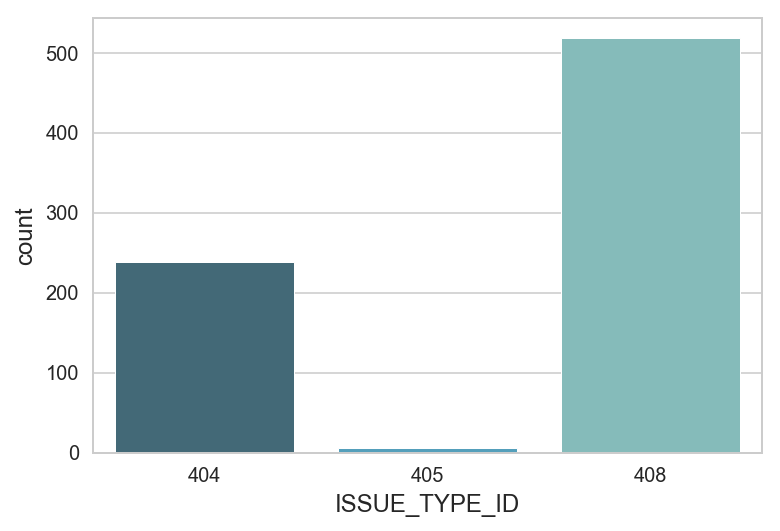

In [36]:
#issue type breakdown for the issue_count != 1
sns.countplot(x=df.loc[df.ISSUE_COUNT!=1].ISSUE_TYPE_ID, palette='GnBu_d');

In [37]:
df.ISSUE_COUNT.value_counts()

1      2674713
3          173
2          115
4           29
6           27
5           21
9           20
7           20
18          16
8           16
21          12
12          10
29          10
19          10
47          10
10           9
30           9
22           8
48           8
13           8
24           8
31           7
43           7
20           7
14           7
39           7
46           6
45           6
17           6
11           6
33           6
25           5
27           5
63           5
75           5
73           5
36           5
40           5
44           4
59           4
26           4
49           4
23           4
16           4
15           4
50           4
38           3
37           3
34           3
41           3
42           3
32           3
28           3
52           3
81           3
77           3
72           3
57           3
62           3
82           2
83           2
74           2
93           2
69           2
66           2
79           2
114       

## CSDC Dataset

In [4]:
cdf = pd.read_csv('CSDC_FAULTSWEEKLY_20181121_164847.csv', sep = '|', parse_dates=['ENTERED_DATETIME'], infer_datetime_format=True)

In [119]:
cdf.head()

,HUB_ACCOUNT_ID,WORK_ORDER_UID,SCHEDULED_DATETIME,TIMESLOT_ID,PRODUCT,PROBLEM_CODE,FINDING_CODE,SOLUTION_CODE,CATEGORY,SUB_CATEGORY,REASON,ASSIGNEE,USER_ID,ENTERED_DATETIME,ENTERED_TIME,COMPLETION_DATETIME,CANCEL_CODE,OS_TYPE,MODEM_TYPE,LAST_CHANGED,LOAD_DATE
0,98499194,20042516548,NaN,NaN,B,IM,NaN,NaN,42119,42120,42121,NaN,F7802300,2018-10-01 00:05:02,00:05:02,NaN,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000
1,90937966,26009766129,NaN,NaN,B,IL,UR,43,48161,48165,48180,NaN,D7834357,2018-10-01 00:08:33,00:08:33,2018-10-01 00:08:33,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000
2,86482877,30022850735,NaN,NaN,D,CA,BC,31,44000,44005,44025,NaN,C7823723,2018-10-01 00:10:34,00:10:34,2018-10-01 00:10:34,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000
3,73995308,20042516549,NaN,NaN,B,IX,NaN,NaN,42091,42092,48308,NaN,G7834704,2018-10-01 00:17:53,00:17:53,NaN,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000
4,78734648,20042516550,NaN,NaN,B,IX,NaN,NaN,42091,42092,48308,NaN,D7834537,2018-10-01 00:21:04,00:21:04,NaN,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000


In [120]:
cdf.dtypes

HUB_ACCOUNT_ID                  int64
WORK_ORDER_UID                  int64
SCHEDULED_DATETIME            float64
TIMESLOT_ID                   float64
PRODUCT                        object
PROBLEM_CODE                   object
FINDING_CODE                   object
SOLUTION_CODE                  object
CATEGORY                        int64
SUB_CATEGORY                    int64
REASON                          int64
ASSIGNEE                      float64
USER_ID                        object
ENTERED_DATETIME       datetime64[ns]
ENTERED_TIME                   object
COMPLETION_DATETIME            object
CANCEL_CODE                   float64
OS_TYPE                       float64
MODEM_TYPE                    float64
LAST_CHANGED                   object
LOAD_DATE                      object
dtype: object

In [112]:
cdf.shape

(81315, 21)

In [6]:
#generating date-time related variables
cdf['DAY'] = cdf.ENTERED_DATETIME.dt.day
cdf['WDAY'] = cdf.ENTERED_DATETIME.dt.weekday_name
cdf['HOUR'] = cdf.ENTERED_DATETIME.dt.hour

In [43]:
cdf.head()

,HUB_ACCOUNT_ID,WORK_ORDER_UID,SCHEDULED_DATETIME,TIMESLOT_ID,PRODUCT,PROBLEM_CODE,FINDING_CODE,SOLUTION_CODE,CATEGORY,SUB_CATEGORY,REASON,ASSIGNEE,USER_ID,ENTERED_DATETIME,ENTERED_TIME,COMPLETION_DATETIME,CANCEL_CODE,OS_TYPE,MODEM_TYPE,LAST_CHANGED,LOAD_DATE,DAY,WDAY,HOUR
0,98499194,20042516548,NaN,NaN,B,IM,NaN,NaN,42119,42120,42121,NaN,F7802300,2018-10-01 00:05:02,00:05:02,NaN,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,0
1,90937966,26009766129,NaN,NaN,B,IL,UR,43,48161,48165,48180,NaN,D7834357,2018-10-01 00:08:33,00:08:33,2018-10-01 00:08:33,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,0
2,86482877,30022850735,NaN,NaN,D,CA,BC,31,44000,44005,44025,NaN,C7823723,2018-10-01 00:10:34,00:10:34,2018-10-01 00:10:34,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,0
3,73995308,20042516549,NaN,NaN,B,IX,NaN,NaN,42091,42092,48308,NaN,G7834704,2018-10-01 00:17:53,00:17:53,NaN,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,0
4,78734648,20042516550,NaN,NaN,B,IX,NaN,NaN,42091,42092,48308,NaN,D7834537,2018-10-01 00:21:04,00:21:04,NaN,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,0


In [44]:
unique_val(cdf)

{'ASSIGNEE': 2,
 'CANCEL_CODE': 1,
 'CATEGORY': 20,
 'COMPLETION_DATETIME': 35562,
 'DAY': 7,
 'ENTERED_DATETIME': 72615,
 'ENTERED_TIME': 41334,
 'FINDING_CODE': 74,
 'HOUR': 24,
 'HUB_ACCOUNT_ID': 72704,
 'LAST_CHANGED': 20,
 'LOAD_DATE': 20,
 'MODEM_TYPE': 7,
 'OS_TYPE': 8,
 'PROBLEM_CODE': 115,
 'PRODUCT': 4,
 'REASON': 232,
 'SCHEDULED_DATETIME': 1,
 'SOLUTION_CODE': 42,
 'SUB_CATEGORY': 74,
 'TIMESLOT_ID': 1,
 'USER_ID': 1139,
 'WDAY': 7,
 'WORK_ORDER_UID': 81315}


In [45]:
#val_count(cdf)

In [7]:
cdf.PRODUCT.unique()

array(['B', 'D', 'T', 'A'], dtype=object)

In [8]:
#product 'D' indicates calls related to DTV
cdf = cdf.loc[cdf.PRODUCT =='D']
cdf.shape

(22317, 24)

In [48]:
cdf.isnull().sum()

HUB_ACCOUNT_ID             0
WORK_ORDER_UID             0
SCHEDULED_DATETIME     22317
TIMESLOT_ID            22317
PRODUCT                    0
PROBLEM_CODE               0
FINDING_CODE           10392
SOLUTION_CODE          10392
CATEGORY                   0
SUB_CATEGORY               0
REASON                     0
ASSIGNEE               22204
USER_ID                    0
ENTERED_DATETIME           0
ENTERED_TIME               0
COMPLETION_DATETIME    10392
CANCEL_CODE            22317
OS_TYPE                22317
MODEM_TYPE             22317
LAST_CHANGED               0
LOAD_DATE                  0
DAY                        0
WDAY                       0
HOUR                       0
dtype: int64

In [49]:
cdf.head()

,HUB_ACCOUNT_ID,WORK_ORDER_UID,SCHEDULED_DATETIME,TIMESLOT_ID,PRODUCT,PROBLEM_CODE,FINDING_CODE,SOLUTION_CODE,CATEGORY,SUB_CATEGORY,REASON,ASSIGNEE,USER_ID,ENTERED_DATETIME,ENTERED_TIME,COMPLETION_DATETIME,CANCEL_CODE,OS_TYPE,MODEM_TYPE,LAST_CHANGED,LOAD_DATE,DAY,WDAY,HOUR
2,86482877,30022850735,NaN,NaN,D,CA,BC,31,44000,44005,44025,NaN,C7823723,2018-10-01 00:10:34,00:10:34,2018-10-01 00:10:34,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,0
6,78286008,25007648476,NaN,NaN,D,CA,KE,96,44000,44005,44025,NaN,K7832354,2018-10-01 00:25:18,00:25:18,2018-10-01 00:25:18,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,0
29,155509359,31021785076,NaN,NaN,D,CA,KE,WA,44000,44005,44025,NaN,H7825113,2018-10-01 05:31:45,05:31:45,2018-10-01 05:31:45,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,5
52,101669898,12012396042,NaN,NaN,D,HZ,HW,96,44000,44005,47029,NaN,K7826431,2018-10-01 07:09:51,07:09:51,2018-10-01 07:09:51,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,7
127,80729438,20042519918,NaN,NaN,D,CA,BP,96,44000,44005,44025,NaN,A7518260,2018-10-01 08:05:02,08:05:02,2018-10-01 08:05:02,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,8


### Unique problem category codes/values

In [50]:
len(cdf.PROBLEM_CODE.unique())

61

In [51]:
len(cdf.FINDING_CODE.unique())

37

In [52]:
len(cdf.SOLUTION_CODE.unique())

31

In [53]:
len(cdf.SUB_CATEGORY.unique())

13

In [54]:
len(cdf.REASON.unique())

73

In [7]:
#resetting index
cdf = cdf.reset_index(drop=True)

### Daily Call Distributions from CSDC

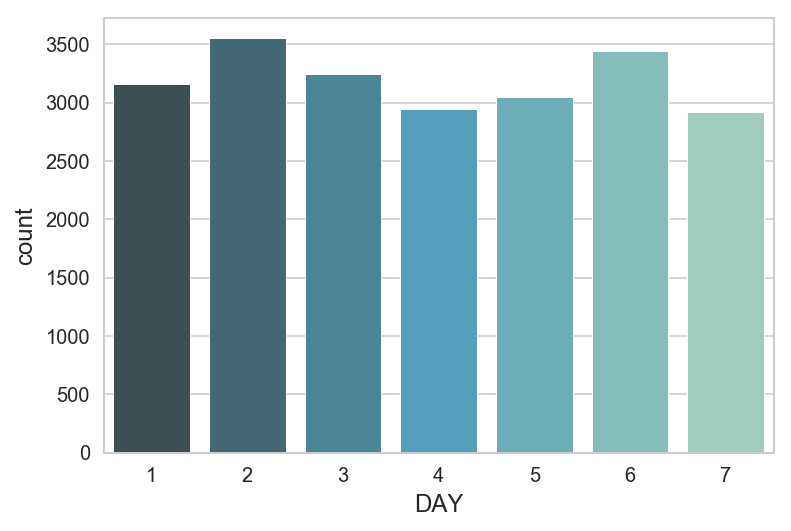

In [55]:
sns.countplot(x='DAY', data=cdf, palette='GnBu_d');

In [56]:
#second data frame with index replaced with entered time
t_cdf = cdf.set_index(['ENTERED_DATETIME'])

In [57]:
#sorting index values
t_cdf.sort_index(inplace=True)

### Hourly Call Distributions

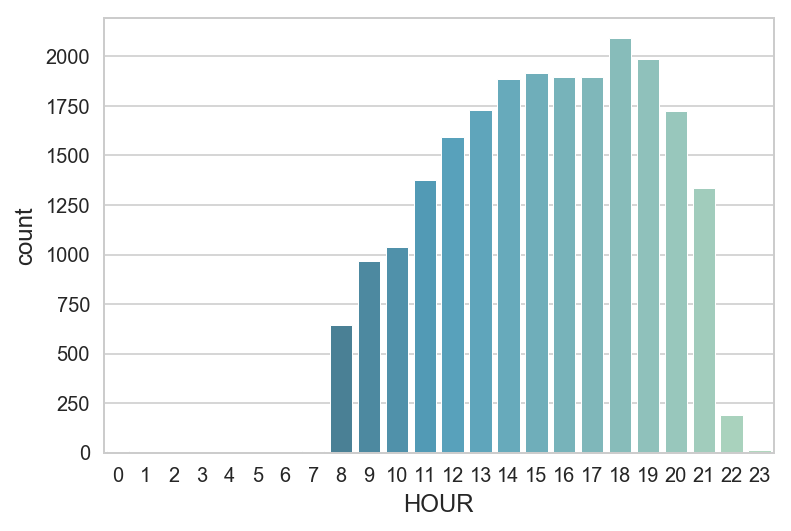

In [58]:
sns.countplot(x='HOUR', data=t_cdf, palette='GnBu_d');

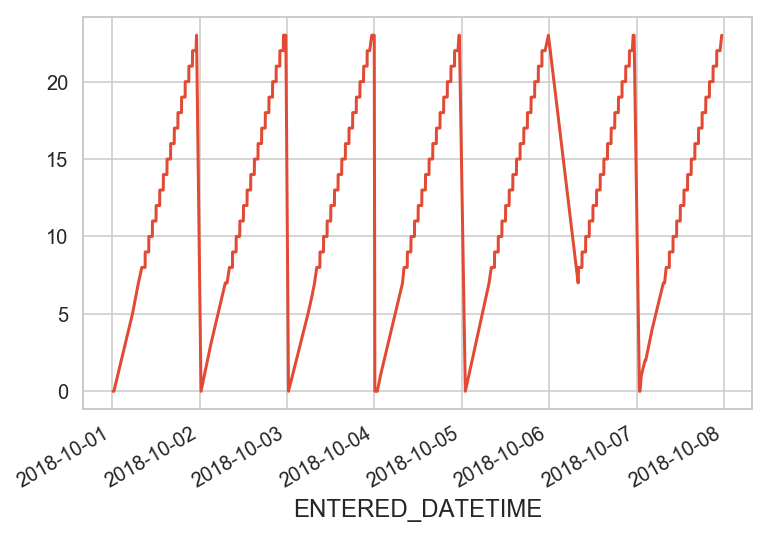

In [59]:
t_cdf.HOUR.plot();

### Hourly Call Distributions on each day

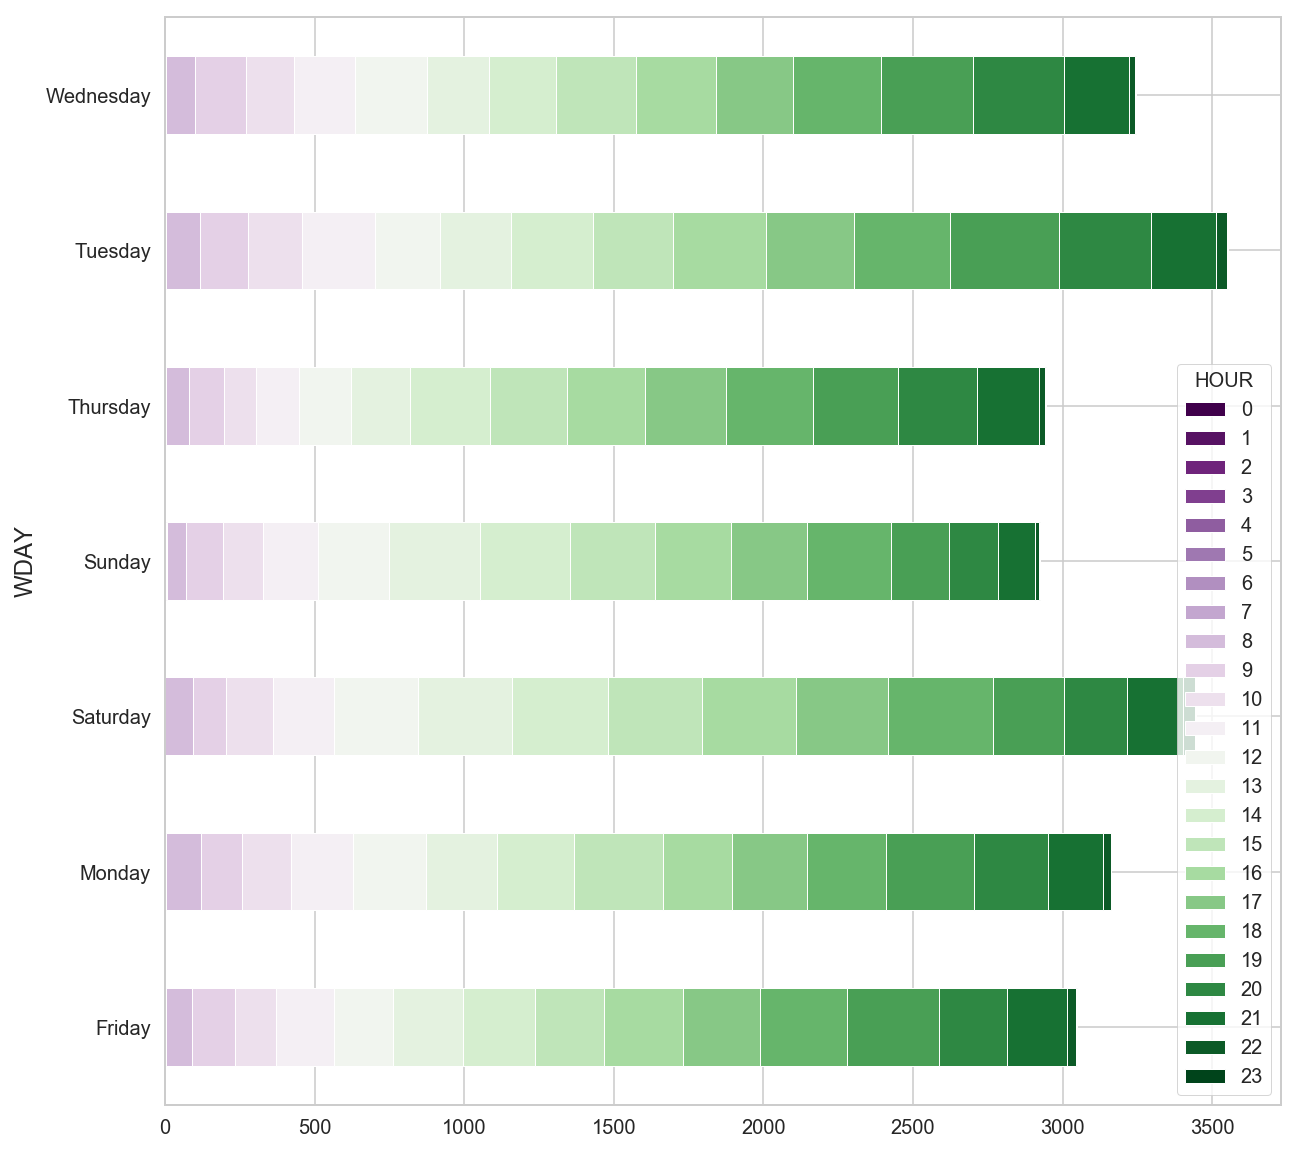

In [60]:
cdf.groupby(['WDAY', 'HOUR'])['HOUR'].count().unstack().plot(kind='barh', stacked=True, figsize = (10,10), colormap = 'PRGn');

In [61]:
cdf.PROBLEM_CODE.value_counts()

CA    6256
DT    4592
HZ    1848
CF    1498
CK    1445
CO    1125
CE     879
DD     860
CH     407
E5     386
DV     300
DH     294
E3     237
AL     216
AC     194
DB     187
HY     172
CL     166
CG     159
GJ     150
CD     149
GI     117
DA     109
DF      62
E6      59
DQ      54
E2      42
DP      38
CR      31
DC      27
E7      26
CJ      26
DS      21
GC      20
DO      20
G6      17
AN      17
DN      17
E8      15
E4      10
DE       7
G8       7
VK       6
G2       6
GG       6
CP       5
G0       4
CI       4
AP       3
GF       3
DR       2
CM       2
E0       2
CN       2
AR       2
AM       2
E9       2
GD       1
VG       1
DL       1
DG       1
Name: PROBLEM_CODE, dtype: int64

In [62]:
cdf.columns

Index(['HUB_ACCOUNT_ID', 'WORK_ORDER_UID', 'SCHEDULED_DATETIME', 'TIMESLOT_ID',
       'PRODUCT', 'PROBLEM_CODE', 'FINDING_CODE', 'SOLUTION_CODE', 'CATEGORY',
       'SUB_CATEGORY', 'REASON', 'ASSIGNEE', 'USER_ID', 'ENTERED_DATETIME',
       'ENTERED_TIME', 'COMPLETION_DATETIME', 'CANCEL_CODE', 'OS_TYPE',
       'MODEM_TYPE', 'LAST_CHANGED', 'LOAD_DATE', 'DAY', 'WDAY', 'HOUR'],
      dtype='object')

In [7]:
cdf.CATEGORY.value_counts()

44000    22317
Name: CATEGORY, dtype: int64

## WO_CLOSED_FAULTS

In [9]:
wo = pd.read_csv('WO_FAULTS_CLOSED_WEEKLY_20181121_164431.csv', sep='|', parse_dates=['ENTERED_DATETIME'], infer_datetime_format=True)

In [10]:
wo.shape

(84821, 17)

In [11]:
wo.head()

,CUSTOMER_ACCOUNT_ID,WORK_ORDER_UID,ENTERED_DATETIME,CLOSED_DATETIME,W_O_STATUS,W_O_CLASS,TRUCKED_FAULT_IND,TIME_SLOT_IND,W_O_PROBLEM_CODE_DESC,SOLUTION_CODE_DESC,CANCEL_CODE_DESC,CANCEL_REASON_USAGE,TIME_OPEN_BAND,VALID_FROM_DATE,VALID_TO_DATE,BATCH_ID,LOAD_DATE
0,98499194,20042516548,2018-10-01 00:05:00,2018-10-01 11:46:00.000000,CN,D,Y,Y,CM OR STB OFFLINE,NaN,AUTO CANCEL BASED ON SMS TEXT,A,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
1,90937966,26009766129,2018-10-01 00:08:00,2018-10-01 00:08:00.000000,CP,D,N,N,BBI SETUP/ADVICE/REQ,RECONFIGURED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
2,86482877,30022850735,2018-10-01 00:10:00,2018-10-01 00:10:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,HIT SENT,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
3,73995308,20042516549,2018-10-01 00:17:00,2018-10-01 02:04:00.000000,CP,D,N,N,OUTAGE,RESEATED,NaN,NaN,1. Up to 1 Week,2018-10-03 21:45:19.000000,2999-12-31 00:00:00.000000,5289557,2018-10-03 00:00:00.000000
4,78734648,20042516550,2018-10-01 00:21:00,2018-10-08 10:02:00.000000,CP,D,N,N,OUTAGE,TIGHTENED,NaN,NaN,1. Up to 1 Week,2018-10-08 21:45:20.000000,2999-12-31 00:00:00.000000,5339521,2018-10-08 00:00:00.000000


In [12]:
#filtering the DTV work orders in CSDC df
wo = wo.loc[wo.WORK_ORDER_UID.isin(cdf.WORK_ORDER_UID)]

In [13]:
#filering out the DTV work orders
wo.W_O_CLASS.unique()

array(['C'], dtype=object)

In [14]:
wo.isnull().sum()

CUSTOMER_ACCOUNT_ID          0
WORK_ORDER_UID               0
ENTERED_DATETIME             0
CLOSED_DATETIME              0
W_O_STATUS                   0
W_O_CLASS                    0
TRUCKED_FAULT_IND            0
TIME_SLOT_IND                0
W_O_PROBLEM_CODE_DESC       16
SOLUTION_CODE_DESC        1245
CANCEL_CODE_DESC         20767
CANCEL_REASON_USAGE      20767
TIME_OPEN_BAND               0
VALID_FROM_DATE              0
VALID_TO_DATE                0
BATCH_ID                     0
LOAD_DATE                    0
dtype: int64

In [12]:
wo.shape

(22129, 17)

In [71]:
wo.head()

,CUSTOMER_ACCOUNT_ID,WORK_ORDER_UID,ENTERED_DATETIME,CLOSED_DATETIME,W_O_STATUS,W_O_CLASS,TRUCKED_FAULT_IND,TIME_SLOT_IND,W_O_PROBLEM_CODE_DESC,SOLUTION_CODE_DESC,CANCEL_CODE_DESC,CANCEL_REASON_USAGE,TIME_OPEN_BAND,VALID_FROM_DATE,VALID_TO_DATE,BATCH_ID,LOAD_DATE
2,86482877,30022850735,2018-10-01 00:10:00,2018-10-01 00:10:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,HIT SENT,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
6,78286008,25007648476,2018-10-01 00:25:00,2018-10-01 00:25:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,RESOLVED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
33,155509359,31021785076,2018-10-01 05:31:00,2018-10-01 05:31:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,WORK AROUND,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
57,101669898,12012396042,2018-10-01 07:09:00,2018-10-01 07:09:00.000000,CP,C,N,N,LOSS OF SOUND AND PIC,RESOLVED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
136,87579944,14015691007,2018-10-01 08:05:00,2018-10-01 08:05:00.000000,CP,C,N,N,FREEZE/BLOCK/BLANK,RESEATED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000


In [72]:
#problem codes
wo.W_O_PROBLEM_CODE_DESC.value_counts()

ERR CODE-ON SCREEN       6207
POWER LOSS DHT           2786
LOSS OF SOUND AND PIC    1846
POOR PICTURE             1496
REMOTE - NOT WORKING     1444
POWER LOSS TO DHT        1354
UNEXPECT STB ACTION      1126
PARTIAL LOSS OF TV CH     876
FREEZE/BLOCK/BLANK        836
TOTAL LOSS-DIGITAL TV     396
TIVO APPS                 378
TPT/PPV CAN'T BUY         363
TV GUIDE-NOT WORKING      300
MINI GUIDE - FAILED       294
TIVO NETWORK AVAIL        236
TVDRV-FAILED RECORD       216
TIVO STUCK ON 25%"        193
DIG STB SLOW ACTION       187
NO POWER TO STB           172
STB NOT RESPONDING        166
POOR SOUND                158
LOSS - SOUND              149
AUTHEN-USER NA & PASS     145
AUTHEN-NOT REG            116
BOX UPDATING              107
TIVO HOME NETWORKING       59
RED BUTTON-NOT THERE       53
INTERACTIVE-NO ACCESS      50
TIVO CHAN NOT AUTH         42
RED BUTTON - FAILED        35
CANT CHANGE CHANNEL        31
TIVO BBC I PLAYER          26
ERR CODE-STB PANEL         26
TPT/PPV CA

In [73]:
#work order class value counts
wo.W_O_CLASS.value_counts()

C    22129
Name: W_O_CLASS, dtype: int64

In [74]:
wo.W_O_STATUS.value_counts()

CP    20898
CN     1231
Name: W_O_STATUS, dtype: int64

### Time Open Banding (~Duration in which the ticket was open)

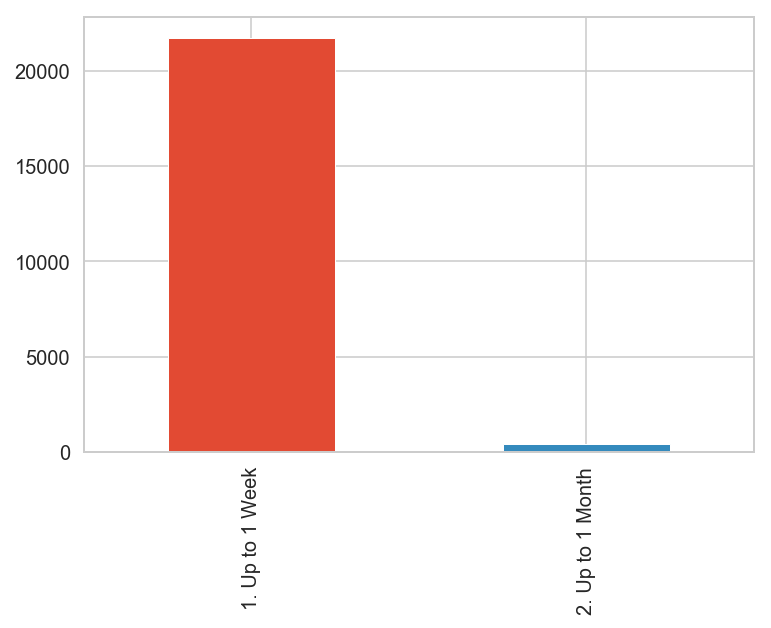

In [75]:
wo.TIME_OPEN_BAND.value_counts().plot(kind='bar');

In [76]:
#solution codes - does replaced mean the STB was replaced?
wo.SOLUTION_CODE_DESC.value_counts()

REPLACED                               6196
RESOLVED                               3374
CLARIFICATION OF SERVICE               2207
HIT SENT                               2199
MAINS RESET                            1099
WORK AROUND                             935
UNABLE TO CONTACT CUSTOMER              922
RESEATED                                606
CUSTOMER CANCELLED                      362
COMPLETED - NO FURTHER REQUIREMENTS     347
MAINS POWER RESTORED                    266
PROVIDE                                 200
OUTAGE OPEN                             167
OUTAGE RELATED                          165
MOVED TO CORRECT RF TAP                 160
CHARGEABLE VISIT                        159
RIGHT WHEN TESTED                       157
RECONFIGURED                            142
CUSTOMER EDUCATION                      135
RECONNECTED                             106
TIVO FORCED CONNECTION                  103
TIGHTENED                                78
SERVICE CHECKED AND WORKING     

### Engineer Visits to Resolve the Errors

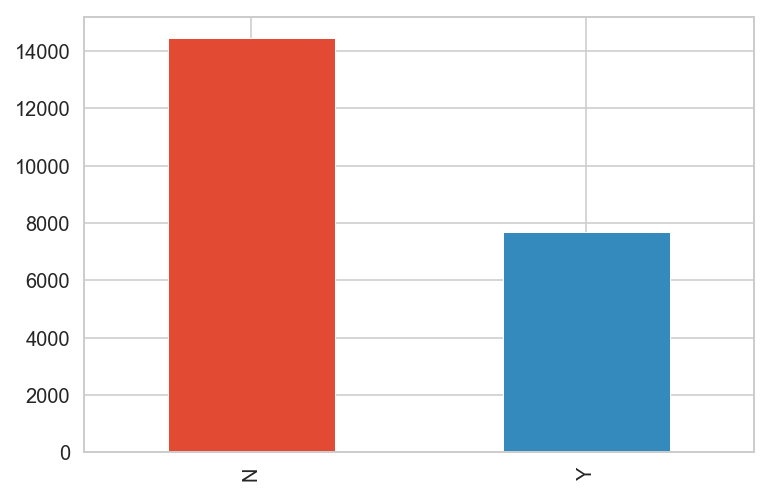

In [77]:
wo.TRUCKED_FAULT_IND.value_counts().plot(kind='bar');

## Data Set with Einstein Detail, CSDC & WO Faults Tables

In [15]:
wo.reset_index(inplace=True, drop=True)

In [16]:
wo.head()

,CUSTOMER_ACCOUNT_ID,WORK_ORDER_UID,ENTERED_DATETIME,CLOSED_DATETIME,W_O_STATUS,W_O_CLASS,TRUCKED_FAULT_IND,TIME_SLOT_IND,W_O_PROBLEM_CODE_DESC,SOLUTION_CODE_DESC,CANCEL_CODE_DESC,CANCEL_REASON_USAGE,TIME_OPEN_BAND,VALID_FROM_DATE,VALID_TO_DATE,BATCH_ID,LOAD_DATE
0,86482877,30022850735,2018-10-01 00:10:00,2018-10-01 00:10:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,HIT SENT,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
1,78286008,25007648476,2018-10-01 00:25:00,2018-10-01 00:25:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,RESOLVED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
2,155509359,31021785076,2018-10-01 05:31:00,2018-10-01 05:31:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,WORK AROUND,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
3,101669898,12012396042,2018-10-01 07:09:00,2018-10-01 07:09:00.000000,CP,C,N,N,LOSS OF SOUND AND PIC,RESOLVED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
4,87579944,14015691007,2018-10-01 08:05:00,2018-10-01 08:05:00.000000,CP,C,N,N,FREEZE/BLOCK/BLANK,RESEATED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000


In [17]:
print(wo.WORK_ORDER_UID.dtypes)
print(cdf.WORK_ORDER_UID.dtypes)

int64
int64


In [18]:
wo.WORK_ORDER_UID = wo.WORK_ORDER_UID.astype(str)

In [19]:
cdf.WORK_ORDER_UID = cdf.WORK_ORDER_UID.astype(str)

In [20]:
wo.head()

,CUSTOMER_ACCOUNT_ID,WORK_ORDER_UID,ENTERED_DATETIME,CLOSED_DATETIME,W_O_STATUS,W_O_CLASS,TRUCKED_FAULT_IND,TIME_SLOT_IND,W_O_PROBLEM_CODE_DESC,SOLUTION_CODE_DESC,CANCEL_CODE_DESC,CANCEL_REASON_USAGE,TIME_OPEN_BAND,VALID_FROM_DATE,VALID_TO_DATE,BATCH_ID,LOAD_DATE
0,86482877,30022850735,2018-10-01 00:10:00,2018-10-01 00:10:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,HIT SENT,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
1,78286008,25007648476,2018-10-01 00:25:00,2018-10-01 00:25:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,RESOLVED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
2,155509359,31021785076,2018-10-01 05:31:00,2018-10-01 05:31:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,WORK AROUND,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
3,101669898,12012396042,2018-10-01 07:09:00,2018-10-01 07:09:00.000000,CP,C,N,N,LOSS OF SOUND AND PIC,RESOLVED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000
4,87579944,14015691007,2018-10-01 08:05:00,2018-10-01 08:05:00.000000,CP,C,N,N,FREEZE/BLOCK/BLANK,RESEATED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000


In [21]:
#cdf.reset_index(inplace=True, drop=True)

In [22]:
cdf.head()

,HUB_ACCOUNT_ID,WORK_ORDER_UID,SCHEDULED_DATETIME,TIMESLOT_ID,PRODUCT,PROBLEM_CODE,FINDING_CODE,SOLUTION_CODE,CATEGORY,SUB_CATEGORY,REASON,ASSIGNEE,USER_ID,ENTERED_DATETIME,ENTERED_TIME,COMPLETION_DATETIME,CANCEL_CODE,OS_TYPE,MODEM_TYPE,LAST_CHANGED,LOAD_DATE,DAY,WDAY,HOUR
2,86482877,30022850735,NaN,NaN,D,CA,BC,31,44000,44005,44025,NaN,C7823723,2018-10-01 00:10:34,00:10:34,2018-10-01 00:10:34,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,0
6,78286008,25007648476,NaN,NaN,D,CA,KE,96,44000,44005,44025,NaN,K7832354,2018-10-01 00:25:18,00:25:18,2018-10-01 00:25:18,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,0
29,155509359,31021785076,NaN,NaN,D,CA,KE,WA,44000,44005,44025,NaN,H7825113,2018-10-01 05:31:45,05:31:45,2018-10-01 05:31:45,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,5
52,101669898,12012396042,NaN,NaN,D,HZ,HW,96,44000,44005,47029,NaN,K7826431,2018-10-01 07:09:51,07:09:51,2018-10-01 07:09:51,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,7
127,80729438,20042519918,NaN,NaN,D,CA,BP,96,44000,44005,44025,NaN,A7518260,2018-10-01 08:05:02,08:05:02,2018-10-01 08:05:02,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,8


In [23]:
cdf.WORK_ORDER_UID.map(lambda x:1 if type(x)==int else 0).value_counts()

0    22317
Name: WORK_ORDER_UID, dtype: int64

In [24]:
wo.WORK_ORDER_UID.map(lambda x:1 if type(x)==int else 0).value_counts()

0    22129
Name: WORK_ORDER_UID, dtype: int64

In [25]:
wo.dtypes

CUSTOMER_ACCOUNT_ID               int64
WORK_ORDER_UID                   object
ENTERED_DATETIME         datetime64[ns]
CLOSED_DATETIME                  object
W_O_STATUS                       object
W_O_CLASS                        object
TRUCKED_FAULT_IND                object
TIME_SLOT_IND                    object
W_O_PROBLEM_CODE_DESC            object
SOLUTION_CODE_DESC               object
CANCEL_CODE_DESC                 object
CANCEL_REASON_USAGE              object
TIME_OPEN_BAND                   object
VALID_FROM_DATE                  object
VALID_TO_DATE                    object
BATCH_ID                          int64
LOAD_DATE                        object
dtype: object

In [26]:
cdf.dtypes

HUB_ACCOUNT_ID                  int64
WORK_ORDER_UID                 object
SCHEDULED_DATETIME            float64
TIMESLOT_ID                   float64
PRODUCT                        object
PROBLEM_CODE                   object
FINDING_CODE                   object
SOLUTION_CODE                  object
CATEGORY                        int64
SUB_CATEGORY                    int64
REASON                          int64
ASSIGNEE                      float64
USER_ID                        object
ENTERED_DATETIME       datetime64[ns]
ENTERED_TIME                   object
COMPLETION_DATETIME            object
CANCEL_CODE                   float64
OS_TYPE                       float64
MODEM_TYPE                    float64
LAST_CHANGED                   object
LOAD_DATE                      object
DAY                             int64
WDAY                           object
HOUR                            int64
dtype: object

In [27]:
wo.WORK_ORDER_UID.dtypes

dtype('O')

In [28]:
wo_csdc = pd.merge(wo, cdf, on='WORK_ORDER_UID', how='inner', suffixes=('_csdc', '_wo'))

In [29]:
wo_csdc.head()

,CUSTOMER_ACCOUNT_ID,WORK_ORDER_UID,ENTERED_DATETIME_csdc,CLOSED_DATETIME,W_O_STATUS,W_O_CLASS,TRUCKED_FAULT_IND,TIME_SLOT_IND,W_O_PROBLEM_CODE_DESC,SOLUTION_CODE_DESC,CANCEL_CODE_DESC,CANCEL_REASON_USAGE,TIME_OPEN_BAND,VALID_FROM_DATE,VALID_TO_DATE,BATCH_ID,LOAD_DATE_csdc,HUB_ACCOUNT_ID,SCHEDULED_DATETIME,TIMESLOT_ID,PRODUCT,PROBLEM_CODE,FINDING_CODE,SOLUTION_CODE,CATEGORY,SUB_CATEGORY,REASON,ASSIGNEE,USER_ID,ENTERED_DATETIME_wo,ENTERED_TIME,COMPLETION_DATETIME,CANCEL_CODE,OS_TYPE,MODEM_TYPE,LAST_CHANGED,LOAD_DATE_wo,DAY,WDAY,HOUR
0,86482877,30022850735,2018-10-01 00:10:00,2018-10-01 00:10:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,HIT SENT,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000,86482877,NaN,NaN,D,CA,BC,31,44000,44005,44025,NaN,C7823723,2018-10-01 00:10:34,00:10:34,2018-10-01 00:10:34,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,0
1,78286008,25007648476,2018-10-01 00:25:00,2018-10-01 00:25:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,RESOLVED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000,78286008,NaN,NaN,D,CA,KE,96,44000,44005,44025,NaN,K7832354,2018-10-01 00:25:18,00:25:18,2018-10-01 00:25:18,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,0
2,155509359,31021785076,2018-10-01 05:31:00,2018-10-01 05:31:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,WORK AROUND,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000,155509359,NaN,NaN,D,CA,KE,WA,44000,44005,44025,NaN,H7825113,2018-10-01 05:31:45,05:31:45,2018-10-01 05:31:45,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,5
3,101669898,12012396042,2018-10-01 07:09:00,2018-10-01 07:09:00.000000,CP,C,N,N,LOSS OF SOUND AND PIC,RESOLVED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000,101669898,NaN,NaN,D,HZ,HW,96,44000,44005,47029,NaN,K7826431,2018-10-01 07:09:51,07:09:51,2018-10-01 07:09:51,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,7
4,87579944,14015691007,2018-10-01 08:05:00,2018-10-01 08:05:00.000000,CP,C,N,N,FREEZE/BLOCK/BLANK,RESEATED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,5249170,2018-10-01 00:00:00.000000,87579944,NaN,NaN,D,DD,8K,51,44000,44110,44115,NaN,M7815899,2018-10-01 08:05:16,08:05:16,2018-10-01 08:05:16,NaN,NaN,NaN,2018-10-01 00:00:00.000000,2018-10-01 21:45:15.000000,1,Monday,8


In [30]:
wo_csdc.shape

(22129, 40)

In [31]:
wo_csdc.columns

Index(['CUSTOMER_ACCOUNT_ID', 'WORK_ORDER_UID', 'ENTERED_DATETIME_csdc',
       'CLOSED_DATETIME', 'W_O_STATUS', 'W_O_CLASS', 'TRUCKED_FAULT_IND',
       'TIME_SLOT_IND', 'W_O_PROBLEM_CODE_DESC', 'SOLUTION_CODE_DESC',
       'CANCEL_CODE_DESC', 'CANCEL_REASON_USAGE', 'TIME_OPEN_BAND',
       'VALID_FROM_DATE', 'VALID_TO_DATE', 'BATCH_ID', 'LOAD_DATE_csdc',
       'HUB_ACCOUNT_ID', 'SCHEDULED_DATETIME', 'TIMESLOT_ID', 'PRODUCT',
       'PROBLEM_CODE', 'FINDING_CODE', 'SOLUTION_CODE', 'CATEGORY',
       'SUB_CATEGORY', 'REASON', 'ASSIGNEE', 'USER_ID', 'ENTERED_DATETIME_wo',
       'ENTERED_TIME', 'COMPLETION_DATETIME', 'CANCEL_CODE', 'OS_TYPE',
       'MODEM_TYPE', 'LAST_CHANGED', 'LOAD_DATE_wo', 'DAY', 'WDAY', 'HOUR'],
      dtype='object')

In [32]:
wo_csdc.isnull().sum()

CUSTOMER_ACCOUNT_ID          0
WORK_ORDER_UID               0
ENTERED_DATETIME_csdc        0
CLOSED_DATETIME              0
W_O_STATUS                   0
W_O_CLASS                    0
TRUCKED_FAULT_IND            0
TIME_SLOT_IND                0
W_O_PROBLEM_CODE_DESC       16
SOLUTION_CODE_DESC        1245
CANCEL_CODE_DESC         20767
CANCEL_REASON_USAGE      20767
TIME_OPEN_BAND               0
VALID_FROM_DATE              0
VALID_TO_DATE                0
BATCH_ID                     0
LOAD_DATE_csdc               0
HUB_ACCOUNT_ID               0
SCHEDULED_DATETIME       22129
TIMESLOT_ID              22129
PRODUCT                      0
PROBLEM_CODE                 0
FINDING_CODE             10204
SOLUTION_CODE            10204
CATEGORY                     0
SUB_CATEGORY                 0
REASON                       0
ASSIGNEE                 22019
USER_ID                      0
ENTERED_DATETIME_wo          0
ENTERED_TIME                 0
COMPLETION_DATETIME      10204
CANCEL_C

In [33]:
#dropping 'CANCEL_CODE', 'OS_TYPE','MODEM_TYPE', 'LAST_CHANGED', 'LOAD_DATE_wo','LOAD_DATE_csdc', 'ASSIGNEE', 'USER_ID' columns  'DAY', 'WDAY', 'HOUR'
wo_csdc = wo_csdc[['CUSTOMER_ACCOUNT_ID', 'WORK_ORDER_UID', 'ENTERED_DATETIME_csdc',
       'CLOSED_DATETIME', 'W_O_STATUS', 'W_O_CLASS', 'TRUCKED_FAULT_IND',
       'TIME_SLOT_IND', 'W_O_PROBLEM_CODE_DESC', 'SOLUTION_CODE_DESC',
       'CANCEL_CODE_DESC', 'CANCEL_REASON_USAGE', 'TIME_OPEN_BAND',
       'VALID_FROM_DATE', 'VALID_TO_DATE', 
       'HUB_ACCOUNT_ID', 'SCHEDULED_DATETIME', 'TIMESLOT_ID', 'PRODUCT',
       'PROBLEM_CODE', 'FINDING_CODE', 'SOLUTION_CODE', 'CATEGORY',
       'SUB_CATEGORY', 'REASON',  'ENTERED_DATETIME_wo',
       'ENTERED_TIME', 'COMPLETION_DATETIME', ]]

In [34]:
#wo_csdc = wo_csdc.sort_values(by=['ENTERED_DATETIME_csdc', 'CUSTOMER_ACCOUNT_ID'])

In [35]:
#wo_csdc = wo_csdc.set_index('ENTERED_DATETIME_csdc')
#wo_csdc.index.name = None

In [36]:
wo_csdc.head()

,CUSTOMER_ACCOUNT_ID,WORK_ORDER_UID,ENTERED_DATETIME_csdc,CLOSED_DATETIME,W_O_STATUS,W_O_CLASS,TRUCKED_FAULT_IND,TIME_SLOT_IND,W_O_PROBLEM_CODE_DESC,SOLUTION_CODE_DESC,CANCEL_CODE_DESC,CANCEL_REASON_USAGE,TIME_OPEN_BAND,VALID_FROM_DATE,VALID_TO_DATE,HUB_ACCOUNT_ID,SCHEDULED_DATETIME,TIMESLOT_ID,PRODUCT,PROBLEM_CODE,FINDING_CODE,SOLUTION_CODE,CATEGORY,SUB_CATEGORY,REASON,ENTERED_DATETIME_wo,ENTERED_TIME,COMPLETION_DATETIME
0,86482877,30022850735,2018-10-01 00:10:00,2018-10-01 00:10:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,HIT SENT,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,86482877,NaN,NaN,D,CA,BC,31,44000,44005,44025,2018-10-01 00:10:34,00:10:34,2018-10-01 00:10:34
1,78286008,25007648476,2018-10-01 00:25:00,2018-10-01 00:25:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,RESOLVED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,78286008,NaN,NaN,D,CA,KE,96,44000,44005,44025,2018-10-01 00:25:18,00:25:18,2018-10-01 00:25:18
2,155509359,31021785076,2018-10-01 05:31:00,2018-10-01 05:31:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,WORK AROUND,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,155509359,NaN,NaN,D,CA,KE,WA,44000,44005,44025,2018-10-01 05:31:45,05:31:45,2018-10-01 05:31:45
3,101669898,12012396042,2018-10-01 07:09:00,2018-10-01 07:09:00.000000,CP,C,N,N,LOSS OF SOUND AND PIC,RESOLVED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,101669898,NaN,NaN,D,HZ,HW,96,44000,44005,47029,2018-10-01 07:09:51,07:09:51,2018-10-01 07:09:51
4,87579944,14015691007,2018-10-01 08:05:00,2018-10-01 08:05:00.000000,CP,C,N,N,FREEZE/BLOCK/BLANK,RESEATED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,87579944,NaN,NaN,D,DD,8K,51,44000,44110,44115,2018-10-01 08:05:16,08:05:16,2018-10-01 08:05:16


In [39]:
df_copy = df.copy()
#df_copy = df_copy.set_index('ISSUE_TIMESTAMP')
#df_copy.index.name = None

In [56]:
len(df.BATCH_ID.unique())

7

In [57]:
len(wo_csdc_mil.BATCH_ID.unique())

8

In [55]:
wo_csdc_mil = pd.merge(df_copy, wo_csdc, suffixes=('_mil', '_wo_cs'), how='outer')           

In [62]:
wo_csdc['acc_in_mil'] = wo_csdc['CUSTOMER_ACCOUNT_ID'].map(lambda x: 1 if x in df_copy['CUSTOMER_ACCOUNT_ID'].unique() else 0)

In [72]:
a = [i for i in wo_csdc['CUSTOMER_ACCOUNT_ID'].unique() if i in df_copy['CUSTOMER_ACCOUNT_ID'].unique()]

In [74]:
len(a)

5067

In [75]:
b = pd.merge(df_copy, wo_csdc, suffixes=('_mil', '_wo_cs'), how='inner', on='CUSTOMER_ACCOUNT_ID')  

In [76]:
b.head()

,ICOMS_ACCOUNT_UID,CUSTOMER_ACCOUNT_ID,EVENT_DATE,ISSUE_ID,ISSUE_TYPE_ID,ISSUE_AREA,ISSUE_COUNT,ISSUE_TIMESTAMP,ISSUE_UPDATED_TIMESTAMP,MAC_ADDRESS,CMTS_ID,CABINET_ID,ICOMS_SITE_ID,PREMISE_ID,ACCOUNT_NUMBER,SERVICE_TYPE,TIME_BANDING,OUTAGEPRIORITY,OUTAGETYPE,OUTAGEID,STB_ID,LOAD_DATE,BATCH_ID,DAY,MONTH,TIME,WDAY,WORK_ORDER_UID,ENTERED_DATETIME_csdc,CLOSED_DATETIME,W_O_STATUS,W_O_CLASS,TRUCKED_FAULT_IND,TIME_SLOT_IND,W_O_PROBLEM_CODE_DESC,SOLUTION_CODE_DESC,CANCEL_CODE_DESC,CANCEL_REASON_USAGE,TIME_OPEN_BAND,VALID_FROM_DATE,VALID_TO_DATE,HUB_ACCOUNT_ID,SCHEDULED_DATETIME,TIMESLOT_ID,PRODUCT,PROBLEM_CODE,FINDING_CODE,SOLUTION_CODE,CATEGORY,SUB_CATEGORY,REASON,ENTERED_DATETIME_wo,ENTERED_TIME,COMPLETION_DATETIME,acc_in_mil
0,21686510302,73045558,2018-10-01 00:00:00.000000,293629827,404,TVE,1,2018-10-01 13:42:18,2018-10-01 22:02:44.000000,2c9569015479,2763,78571,21,6865103,686510302,DTV,DAY,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206,1,10,13:42:18,Monday,21014168136,2018-10-01 19:12:00,2018-10-01 19:12:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,RESOLVED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,73045558,NaN,NaN,D,CA,AF,96,44000,44005,44025,2018-10-01 19:12:36,19:12:36,2018-10-01 19:12:36,1
1,21686510302,73045558,2018-10-01 00:00:00.000000,293629835,404,TVE,1,2018-10-01 13:42:27,2018-10-01 22:02:44.000000,2c9569015479,2763,78571,21,6865103,686510302,DTV,DAY,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206,1,10,13:42:27,Monday,21014168136,2018-10-01 19:12:00,2018-10-01 19:12:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,RESOLVED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,73045558,NaN,NaN,D,CA,AF,96,44000,44005,44025,2018-10-01 19:12:36,19:12:36,2018-10-01 19:12:36,1
2,21686510302,73045558,2018-10-04 00:00:00.000000,9912692,404,TVE,1,2018-10-04 06:22:50,2018-10-04 13:59:05.000000,2c9569015479,2763,78571,21,6865103,686510302,DTV,MORNING,0,NaN,NaN,NaN,2018-10-04 00:00:00.000000,5310996,4,10,06:22:50,Thursday,21014168136,2018-10-01 19:12:00,2018-10-01 19:12:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,RESOLVED,NaN,NaN,1. Up to 1 Week,2018-10-01 21:45:15.000000,2999-12-31 00:00:00.000000,73045558,NaN,NaN,D,CA,AF,96,44000,44005,44025,2018-10-01 19:12:36,19:12:36,2018-10-01 19:12:36,1
3,21628476503,159075213,2018-10-01 00:00:00.000000,292561753,404,TVE,1,2018-10-01 08:52:01,2018-10-01 15:28:55.000000,f82dc0298609,2441,74362,21,6284765,628476503,DTV,MORNING,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206,1,10,08:52:01,Monday,21014189802,2018-10-07 16:39:00,2018-10-08 11:55:00.000000,CN,C,Y,Y,"TIVO STUCK ON 25%""",NaN,AUTO CANCEL BASED ON SMS TEXT,A,1. Up to 1 Week,2018-10-08 21:45:20.000000,2999-12-31 00:00:00.000000,159075213,NaN,NaN,D,AC,NaN,NaN,44000,47072,47125,2018-10-07 16:39:29,16:39:29,NaN,1
4,21628476503,159075213,2018-10-01 00:00:00.000000,295414635,408,TVE,1,2018-10-01 21:30:26,2018-10-02 06:44:31.000000,f82dc0298609,2441,74362,21,6284765,628476503,DTV,PEAK,0,NaN,NaN,NaN,2018-10-01 00:00:00.000000,5249206,1,10,21:30:26,Monday,21014189802,2018-10-07 16:39:00,2018-10-08 11:55:00.000000,CN,C,Y,Y,"TIVO STUCK ON 25%""",NaN,AUTO CANCEL BASED ON SMS TEXT,A,1. Up to 1 Week,2018-10-08 21:45:20.000000,2999-12-31 00:00:00.000000,159075213,NaN,NaN,D,AC,NaN,NaN,44000,47072,47125,2018-10-07 16:39:29,16:39:29,NaN,1


In [63]:
wo_csdc.acc_in_mil.value_counts()

0    16510
1     5619
Name: acc_in_mil, dtype: int64

In [67]:
len(wo_csdc.CUSTOMER_ACCOUNT_ID.unique())

20293

In [68]:
wo_csdc.CUSTOMER_ACCOUNT_ID.isna().sum()

0

In [37]:
a.head()

CUSTOMER_ACCOUNT_ID
69119765    0
69120207    0
69120618    0
69122905    0
69122953    0
Name: ISSUE_TYPE_ID, dtype: int64

In [41]:
wo_csdc_mil.shape

(2700190, 54)

In [42]:
wo_csdc_mil.shape

(2700190, 54)

In [43]:
wo_csdc.shape

(22129, 28)

In [64]:
wo_csdc.CUSTOMER_ACCOUNT_ID.dtype

dtype('int64')

In [65]:
df_copy.CUSTOMER_ACCOUNT_ID.dtype

dtype('int64')

In [44]:
df_copy.shape

(2675476, 27)

In [45]:
2700190-(22129 + 2675476 )

2585

In [48]:
wo_csdc_mil.columns

Index(['ICOMS_ACCOUNT_UID', 'CUSTOMER_ACCOUNT_ID', 'EVENT_DATE', 'ISSUE_ID',
       'ISSUE_TYPE_ID', 'ISSUE_AREA', 'ISSUE_COUNT', 'ISSUE_TIMESTAMP',
       'ISSUE_UPDATED_TIMESTAMP', 'MAC_ADDRESS', 'CMTS_ID', 'CABINET_ID',
       'ICOMS_SITE_ID', 'PREMISE_ID', 'ACCOUNT_NUMBER', 'SERVICE_TYPE',
       'TIME_BANDING', 'OUTAGEPRIORITY', 'OUTAGETYPE', 'OUTAGEID', 'STB_ID',
       'LOAD_DATE', 'BATCH_ID', 'DAY', 'MONTH', 'TIME', 'WDAY',
       'WORK_ORDER_UID', 'ENTERED_DATETIME_csdc', 'CLOSED_DATETIME',
       'W_O_STATUS', 'W_O_CLASS', 'TRUCKED_FAULT_IND', 'TIME_SLOT_IND',
       'W_O_PROBLEM_CODE_DESC', 'SOLUTION_CODE_DESC', 'CANCEL_CODE_DESC',
       'CANCEL_REASON_USAGE', 'TIME_OPEN_BAND', 'VALID_FROM_DATE',
       'VALID_TO_DATE', 'HUB_ACCOUNT_ID', 'SCHEDULED_DATETIME', 'TIMESLOT_ID',
       'PRODUCT', 'PROBLEM_CODE', 'FINDING_CODE', 'SOLUTION_CODE', 'CATEGORY',
       'SUB_CATEGORY', 'REASON', 'ENTERED_DATETIME_wo', 'ENTERED_TIME',
       'COMPLETION_DATETIME'],
      dtype='object')

In [49]:
wo_csdc_mil = wo_csdc_mil[['ICOMS_ACCOUNT_UID', 'CUSTOMER_ACCOUNT_ID', 'ENTERED_DATETIME_csdc', 'ISSUE_TIMESTAMP',
                           'EVENT_DATE', 'ISSUE_ID',
       'ISSUE_TYPE_ID', 'ISSUE_AREA', 'ISSUE_COUNT', 
       'ISSUE_UPDATED_TIMESTAMP', 'MAC_ADDRESS', 'CMTS_ID', 'CABINET_ID',
       'ICOMS_SITE_ID', 'PREMISE_ID', 'ACCOUNT_NUMBER', 'SERVICE_TYPE',
       'TIME_BANDING', 'OUTAGEPRIORITY', 'OUTAGETYPE', 'OUTAGEID', 'STB_ID',
       'LOAD_DATE', 'BATCH_ID', 'DAY', 'MONTH', 'TIME', 'WDAY',
       'WORK_ORDER_UID', 'CLOSED_DATETIME',
       'W_O_STATUS', 'W_O_CLASS', 'TRUCKED_FAULT_IND', 'TIME_SLOT_IND',
       'W_O_PROBLEM_CODE_DESC', 'SOLUTION_CODE_DESC', 'CANCEL_CODE_DESC',
       'CANCEL_REASON_USAGE', 'TIME_OPEN_BAND', 'VALID_FROM_DATE',
       'VALID_TO_DATE', 'HUB_ACCOUNT_ID', 'SCHEDULED_DATETIME', 'TIMESLOT_ID',
       'PRODUCT', 'PROBLEM_CODE', 'FINDING_CODE', 'SOLUTION_CODE', 'CATEGORY',
       'SUB_CATEGORY', 'REASON', 'ENTERED_DATETIME_wo', 'ENTERED_TIME',
       'COMPLETION_DATETIME']]

In [53]:
wo_csdc_mil_sorted = wo_csdc_mil.sort_values(by=['CUSTOMER_ACCOUNT_ID', 'ISSUE_TIMESTAMP', 'ENTERED_DATETIME_csdc'], ascending=True)
wo_csdc_mil_sorted.tail(100)

,ICOMS_ACCOUNT_UID,CUSTOMER_ACCOUNT_ID,ENTERED_DATETIME_csdc,ISSUE_TIMESTAMP,EVENT_DATE,ISSUE_ID,ISSUE_TYPE_ID,ISSUE_AREA,ISSUE_COUNT,ISSUE_UPDATED_TIMESTAMP,MAC_ADDRESS,CMTS_ID,CABINET_ID,ICOMS_SITE_ID,PREMISE_ID,ACCOUNT_NUMBER,SERVICE_TYPE,TIME_BANDING,OUTAGEPRIORITY,OUTAGETYPE,OUTAGEID,STB_ID,LOAD_DATE,BATCH_ID,DAY,MONTH,TIME,WDAY,WORK_ORDER_UID,CLOSED_DATETIME,W_O_STATUS,W_O_CLASS,TRUCKED_FAULT_IND,TIME_SLOT_IND,W_O_PROBLEM_CODE_DESC,SOLUTION_CODE_DESC,CANCEL_CODE_DESC,CANCEL_REASON_USAGE,TIME_OPEN_BAND,VALID_FROM_DATE,VALID_TO_DATE,HUB_ACCOUNT_ID,SCHEDULED_DATETIME,TIMESLOT_ID,PRODUCT,PROBLEM_CODE,FINDING_CODE,SOLUTION_CODE,CATEGORY,SUB_CATEGORY,REASON,ENTERED_DATETIME_wo,ENTERED_TIME,COMPLETION_DATETIME
2501091,3.082641e+10,159786905,NaT,2018-10-06 19:51:32,2018-10-06 00:00:00.000000,5624939.0,404.0,TVE,1.0,2018-10-07 02:35:13.000000,d4ab82319024,2743.0,721312.0,30.0,8264107.0,826410702.0,DTV,PEAK,0.0,NaN,NaN,NaN,2018-10-06 00:00:00.000000,5334636.0,6.0,10.0,19:51:32,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2501095,3.082641e+10,159786905,NaT,2018-10-07 08:12:04,2018-10-07 00:00:00.000000,8427513.0,404.0,TVE,1.0,2018-10-07 15:09:32.000000,d4ab82319024,2743.0,721312.0,30.0,8264107.0,826410702.0,DTV,MORNING,0.0,NaN,NaN,NaN,2018-10-07 00:00:00.000000,5339528.0,7.0,10.0,08:12:04,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2501093,3.082641e+10,159786905,NaT,2018-10-07 08:12:18,2018-10-07 00:00:00.000000,8427497.0,404.0,TVE,1.0,2018-10-07 15:09:32.000000,d4ab82319024,2743.0,721312.0,30.0,8264107.0,826410702.0,DTV,MORNING,0.0,NaN,NaN,NaN,2018-10-07 00:00:00.000000,5339528.0,7.0,10.0,08:12:18,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2501094,3.082641e+10,159786905,NaT,2018-10-07 08:12:22,2018-10-07 00:00:00.000000,8427505.0,404.0,TVE,1.0,2018-10-07 15:09:32.000000,d4ab82319024,2743.0,721312.0,30.0,8264107.0,826410702.0,DTV,MORNING,0.0,NaN,NaN,NaN,2018-10-07 00:00:00.000000,5339528.0,7.0,10.0,08:12:22,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2694956,NaN,159786986,2018-10-05 18:28:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26009781068,2018-10-05 18:28:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,HIT SENT,NaN,NaN,1. Up to 1 Week,2018-10-05 21:45:18.000000,2999-12-31 00:00:00.000000,159786986.0,NaN,NaN,D,CA,BC,31,44000.0,44005.0,44025.0,2018-10-05 18:28:55,18:28:55,2018-10-05 18:28:55
2160923,1.060551e+09,159787566,NaT,2018-10-05 09:03:14,2018-10-05 00:00:00.000000,15520730.0,405.0,TVE,1.0,2018-10-05 15:38:53.000000,bc2e48b7810d,2721.0,629413.0,1.0,605512.0,60551202.0,DTV,MIDMORNING,0.0,NaN,NaN,NaN,2018-10-05 00:00:00.000000,5320357.0,5.0,10.0,09:03:14,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2160922,1.060551e+09,159787566,NaT,2018-10-05 09:06:52,2018-10-05 00:00:00.000000,15520738.0,405.0,TVE,1.0,2018-10-05 15:38:53.000000,bc2e48b7810d,2721.0,629413.0,1.0,605512.0,60551202.0,DTV,MIDMORNING,0.0,NaN,NaN,NaN,2018-10-05 00:00:00.000000,5320357.0,5.0,10.0,09:06:52,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2160921,1.060551e+09,159787566,NaT,2018-10-05 09:12:12,2018-10-05 00:00:00.000000,15520746.0,405.0,TVE,1.0,2018-10-05 15:38:53.000000,bc2e48b7810d,2721.0,629413.0,1.0,605512.0,60551202.0,DTV,MIDMORNING,0.0,NaN,NaN,NaN,2018-10-05 00:00:00.000000,5320357.0,5.0,10.0,09:12:12,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2160920,1.060551e+09,159787566,NaT,2018-10-05 09:12:16,2018-10-05 00:00:00.000000,15520754.0,405.0,TVE,1.0,2018-10-05 15:38:53.000000,bc2e48b7810d,2721.0,629413.0,1.0,605512.0,60551202.0,DTV,MIDMORN

In [59]:
wo_csdc_mil_sorted.loc[wo_csdc_mil.CUSTOMER_ACCOUNT_ID == 159761949]

,ICOMS_ACCOUNT_UID,CUSTOMER_ACCOUNT_ID,ENTERED_DATETIME_csdc,ISSUE_TIMESTAMP,EVENT_DATE,ISSUE_ID,ISSUE_TYPE_ID,ISSUE_AREA,ISSUE_COUNT,ISSUE_UPDATED_TIMESTAMP,MAC_ADDRESS,CMTS_ID,CABINET_ID,ICOMS_SITE_ID,PREMISE_ID,ACCOUNT_NUMBER,SERVICE_TYPE,TIME_BANDING,OUTAGEPRIORITY,OUTAGETYPE,OUTAGEID,STB_ID,LOAD_DATE,BATCH_ID,DAY,MONTH,TIME,WDAY,WORK_ORDER_UID,CLOSED_DATETIME,W_O_STATUS,W_O_CLASS,TRUCKED_FAULT_IND,TIME_SLOT_IND,W_O_PROBLEM_CODE_DESC,SOLUTION_CODE_DESC,CANCEL_CODE_DESC,CANCEL_REASON_USAGE,TIME_OPEN_BAND,VALID_FROM_DATE,VALID_TO_DATE,HUB_ACCOUNT_ID,SCHEDULED_DATETIME,TIMESLOT_ID,PRODUCT,PROBLEM_CODE,FINDING_CODE,SOLUTION_CODE,CATEGORY,SUB_CATEGORY,REASON,ENTERED_DATETIME_wo,ENTERED_TIME,COMPLETION_DATETIME
2688898,NaN,159761949,2018-10-03 08:38:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22023690422,2018-10-03 08:38:00.000000,CP,C,N,N,ERR CODE-ON SCREEN,HIT SENT,NaN,NaN,1. Up to 1 Week,2018-10-03 21:45:19.000000,2999-12-31 00:00:00.000000,159761949.0,NaN,NaN,D,CA,BC,31,44000.0,44005.0,44025.0,2018-10-03 08:38:47,08:38:47,2018-10-03 08:38:47


In [79]:
df_copy.loc[df_copy.CUSTOMER_ACCOUNT_ID == 159761949]

,ICOMS_ACCOUNT_UID,CUSTOMER_ACCOUNT_ID,EVENT_DATE,ISSUE_ID,ISSUE_TYPE_ID,ISSUE_AREA,ISSUE_COUNT,ISSUE_TIMESTAMP,ISSUE_UPDATED_TIMESTAMP,MAC_ADDRESS,CMTS_ID,CABINET_ID,ICOMS_SITE_ID,PREMISE_ID,ACCOUNT_NUMBER,SERVICE_TYPE,TIME_BANDING,OUTAGEPRIORITY,OUTAGETYPE,OUTAGEID,STB_ID,LOAD_DATE,BATCH_ID,DAY,MONTH,TIME,WDAY


In [91]:
len(wo_csdc.CUSTOMER_ACCOUNT_ID.value_counts())

20293

In [93]:
len(df_copy.CUSTOMER_ACCOUNT_ID.unique())

439043

In [ ]:
len(check_col(wo_csdc, df_copy, 'CUSTOMER_ACCOUNT_ID'))